# Life Expectancy Analysis: Exploring Key Determinants  

Life expectancy is a key health indicator that reflects the overall well-being of a population. It encompasses various factors, such as healthcare quality, economic stability, and social progress. Understanding the determinants of life expectancy is critical for guiding policymaking and improving global health outcomes.

This analysis explores global life expectancy trends across multiple countries using data from 2000 to 2014. The objectives of this analysis include:

  -Identifying the primary factors influencing life expectancy.
  -Analyzing trends over time for crucial indicators, including GDP, schooling, healthcare expenditure, immunization rates, and disease prevalence.
  -Comparing life expectancy trends across different regions of the world.
  -Investigating how the relationship between socio-economic factors and life expectancy has evolved over time.  


In [1]:
#import the necessary libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Display settings for better readability
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid") 

#Warnings
import warnings
warnings.simplefilter(action='ignore')

In [2]:
#loading the data
file_path = r"C:\Users\Cate\Desktop\health_and_demographics_dataset\Life_Expectancy_Data.csv"

df = pd.read_csv(file_path)

# print the shape
print(f"This data has {df.shape[0]} rows and {df.shape[1]} columns")

#runs the first 5 rows
df.head()

This data has 1649 rows and 22 columns


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("\nMissing Values:\n", missing_values)


Missing Values:
 Series([], dtype: int64)


In [5]:
#Checking the unique values in the dataset
print("\n Checking Unique Values in Each Column:\n")
for column in df:
    unique_values = np.unique(df[column])
    number_values = len(unique_values)
    if number_values < 20:
        print(f"The number of unique values for '{column}': {number_values} == {unique_values}")
    else:
        print(f"The number of unique values for '{column}': {number_values}")



 Checking Unique Values in Each Column:

The number of unique values for 'Country': 133
The number of unique values for 'Year': 16 == [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
The number of unique values for 'Status': 2 == ['Developed' 'Developing']
The number of unique values for 'Life expectancy ': 320
The number of unique values for 'Adult Mortality': 369
The number of unique values for 'infant deaths': 165
The number of unique values for 'Alcohol': 833
The number of unique values for 'percentage expenditure': 1645
The number of unique values for 'Hepatitis B': 83
The number of unique values for 'Measles ': 603
The number of unique values for ' BMI ': 538
The number of unique values for 'under-five deaths ': 199
The number of unique values for 'Polio': 68
The number of unique values for 'Total expenditure': 669
The number of unique values for 'Diphtheria ': 66
The number of unique values for ' HIV/AIDS': 167
The number of unique values for '

In [6]:
# Checking for duplicates
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")


Total duplicate rows: 0


In [7]:
# Cleaning column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Rename specific columns for clarity
df.rename(columns={
    'life_expectancy': 'life_expectancy_years',
    'adult_mortality': 'adult_mortality_rate',
    'infant_deaths': 'infant_deaths_count',
    'percentage_expenditure': 'health_expenditure_percentage',
    'hepatitis_b': 'hepatitis_b_coverage',
    'measles': 'measles_cases',
    'bmi': 'bmi_index',
    'under-five_deaths': 'under_five_deaths_count',
    'polio': 'polio_coverage',
    'total_expenditure': 'health_expenditure_gdp',
    'diphtheria': 'diphtheria_coverage',
    'hiv/aids': 'hiv_aids_deaths',
    'gdp': 'gdp_usd',
    'population': 'population_count',
    'thinness_1-19_years': 'thinness_10-19_years',
    'thinness_5-9_years': 'thinness_5-9_years',
    'income_composition_of_resources': 'income_composition_index',
    'schooling': 'average_schooling_years'
}, inplace=True)

# Display new column names
print("Updated Column Names:\n", df.columns)


Updated Column Names:
 Index(['country', 'year', 'status', 'life_expectancy_years',
       'adult_mortality_rate', 'infant_deaths_count', 'alcohol',
       'health_expenditure_percentage', 'hepatitis_b_coverage',
       'measles_cases', 'bmi_index', 'under_five_deaths_count',
       'polio_coverage', 'health_expenditure_gdp', 'diphtheria_coverage',
       'hiv_aids_deaths', 'gdp_usd', 'population_count',
       'thinness__1-19_years', 'thinness_5-9_years',
       'income_composition_index', 'average_schooling_years'],
      dtype='object')


In [8]:
# Convert 'Status' to categorical type
df['status'] = df['status'].astype('category')

# Confirm the change
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   country                        1649 non-null   object  
 1   year                           1649 non-null   int64   
 2   status                         1649 non-null   category
 3   life_expectancy_years          1649 non-null   float64 
 4   adult_mortality_rate           1649 non-null   int64   
 5   infant_deaths_count            1649 non-null   int64   
 6   alcohol                        1649 non-null   float64 
 7   health_expenditure_percentage  1649 non-null   float64 
 8   hepatitis_b_coverage           1649 non-null   int64   
 9   measles_cases                  1649 non-null   int64   
 10  bmi_index                      1649 non-null   float64 
 11  under_five_deaths_count        1649 non-null   int64   
 12  polio_coverage                 164

In [9]:
df[df["year"] == 2015]["country"].nunique()

2

In [10]:
df = df[df["year"] != 2015]

In [11]:
df.describe()

,year,life_expectancy_years,adult_mortality_rate,infant_deaths_count,alcohol,health_expenditure_percentage,hepatitis_b_coverage,measles_cases,bmi_index,under_five_deaths_count,polio_coverage,health_expenditure_gdp,diphtheria_coverage,hiv_aids_deaths,gdp_usd,population_count,thinness__1-19_years,thinness_5-9_years,income_composition_index,average_schooling_years
count,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.00000,1647.000000,1647.000000,1647.000000,1.647000e+03,1647.000000,1647.000000,1647.000000,1647.000000
mean,2007.831815,69.299757,168.214936,32.554948,4.535902,699.557463,79.214329,2226.494839,38.128112,44.223437,83.602307,5.95456,84.157863,1.986157,5570.035273,1.465092e+07,4.845355,4.902429,0.631565,12.119854
std,4.082563,8.799045,125.343247,120.915746,4.030093,1760.210462,25.613177,10091.743981,19.754611,162.990487,22.379426,2.30014,21.584035,6.035666,11482.144013,7.050070e+07,4.591059,4.645701,0.183133,2.796172
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.74000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.350000,77.000000,1.000000,0.815000,37.304832,74.000000,0.000000,19.500000,1.000000,81.000000,4.40500,82.000000,0.100000,461.936686,1.929265e+05,1.600000,1.700000,0.509500,10.350000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.84000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.345000,509.996755,96.000000,372.500000,55.800000,29.000000,97.000000,7.46500,97.000000,0.700000,4726.998869,7.625918e+06,7.050000,7.100000,0.751000,14.000000
max,2014.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.39000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


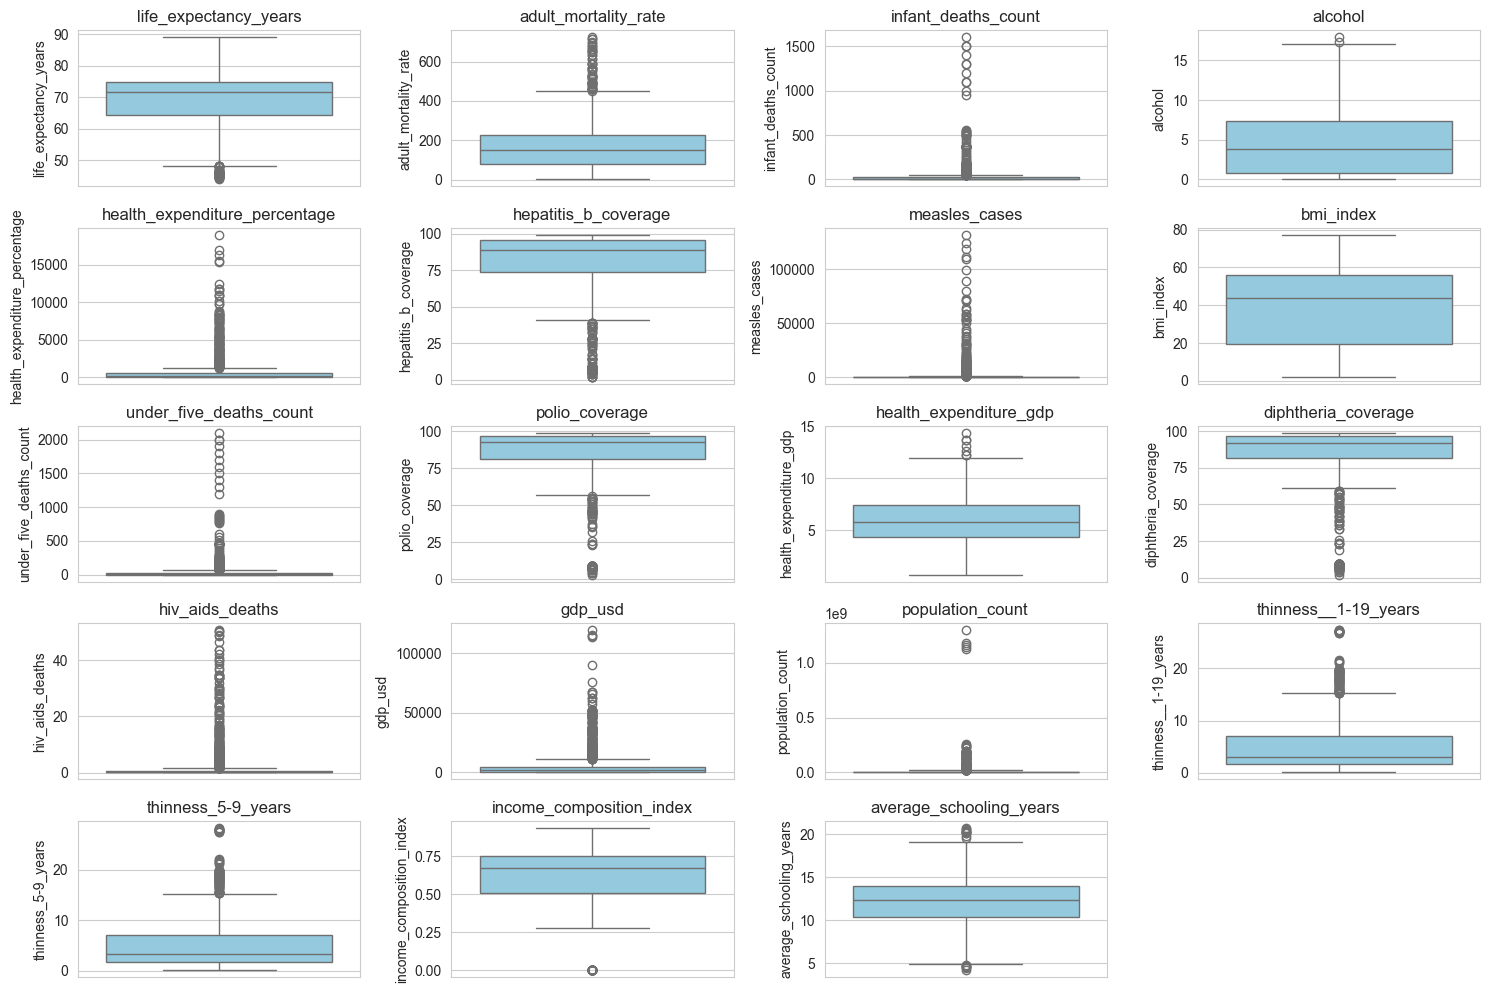

In [12]:
# Selecting numerical columns for visualization
numeric_columns = [
    'life_expectancy_years', 'adult_mortality_rate', 'infant_deaths_count', 'alcohol', 
    'health_expenditure_percentage', 'hepatitis_b_coverage', 'measles_cases', 'bmi_index', 'under_five_deaths_count',
    'polio_coverage', 'health_expenditure_gdp', 'diphtheria_coverage', 'hiv_aids_deaths', 'gdp_usd', 'population_count',
    'thinness__1-19_years', 'thinness_5-9_years', 'income_composition_index', 'average_schooling_years'
]

# Setting plot size
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(column)

plt.tight_layout()
plt.show()


In [13]:
#Log transformation for skewed features
skewed_columns = [
    'infant_deaths_count', 'health_expenditure_percentage', 'measles_cases', 
    'under_five_deaths_count', 'hiv_aids_deaths', 'gdp_usd', 'population_count'
]

for col in skewed_columns:
    df[col + '_log'] = np.log1p(df[col])

# Verify transformation
df[["infant_deaths_count", "infant_deaths_count_log", "gdp_usd", "gdp_usd_log"]].head()


,infant_deaths_count,infant_deaths_count_log,gdp_usd,gdp_usd_log
1,64,4.174387,612.696514,6.419501
2,66,4.204693,631.744976,6.450067
3,69,4.248495,669.959000,6.508708
4,71,4.276666,63.537231,4.167242
5,74,4.317488,553.328940,6.317758


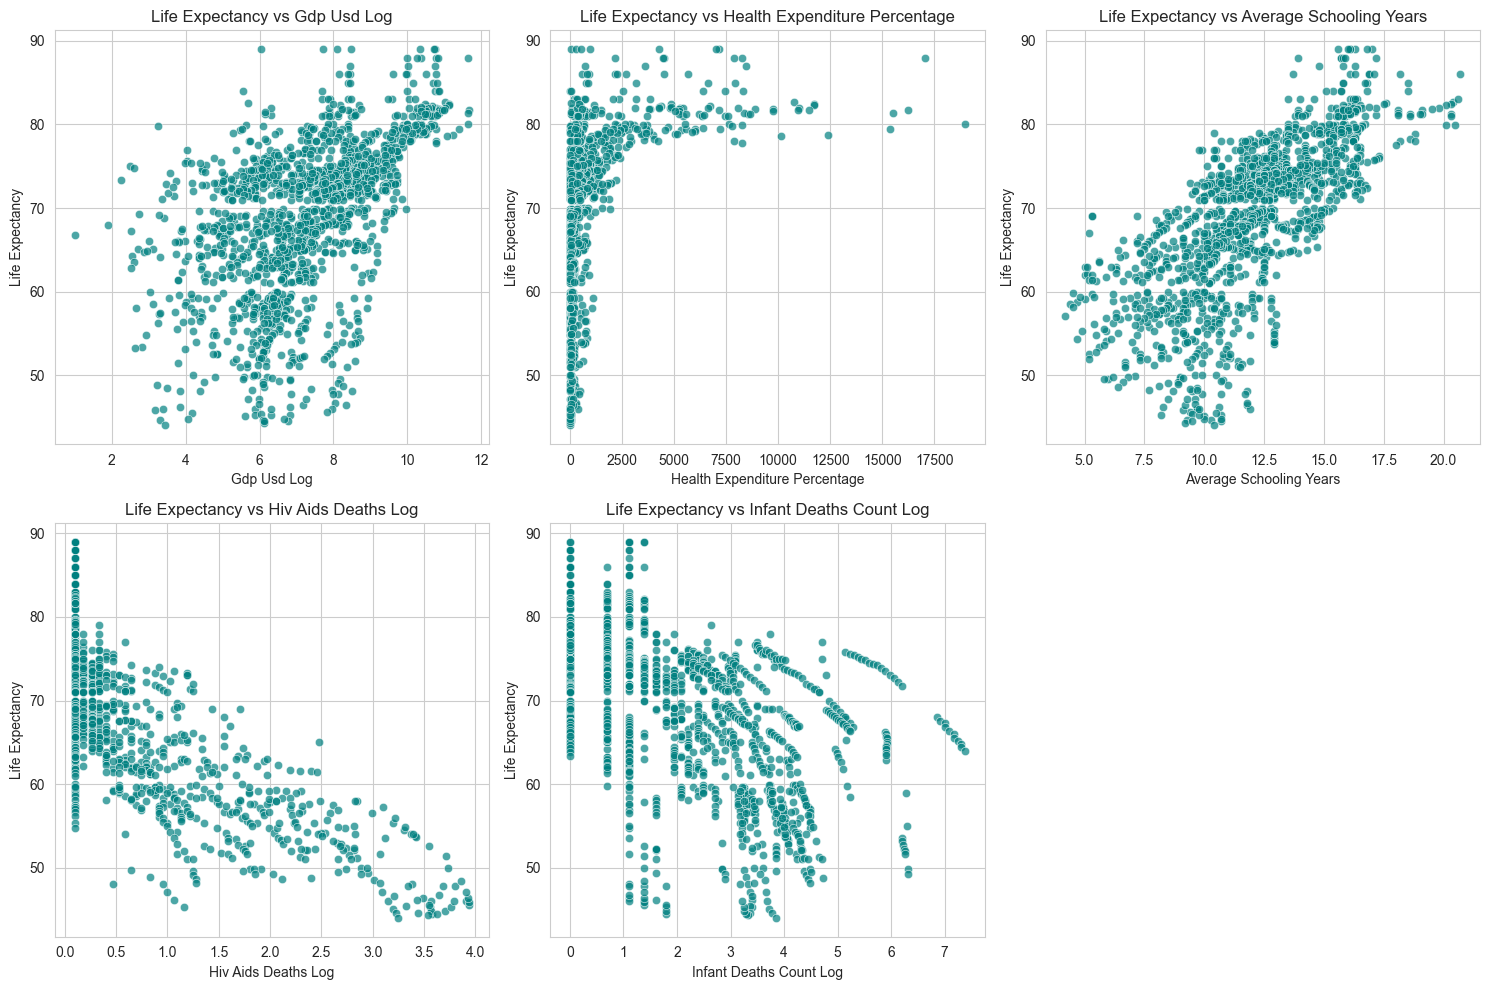

In [14]:
# List of key factors to compare with Life Expectancy
key_factors = ['gdp_usd_log', 'health_expenditure_percentage', 'average_schooling_years', 'hiv_aids_deaths_log', 'infant_deaths_count_log']

plt.figure(figsize=(15, 10))
for i, factor in enumerate(key_factors, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[factor], y=df['life_expectancy_years'], alpha=0.7, color='teal')
    plt.title(f"Life Expectancy vs {factor.replace('_', ' ').title()}")
    plt.xlabel(factor.replace('_', ' ').title())
    plt.ylabel("Life Expectancy")

plt.tight_layout()
plt.show()


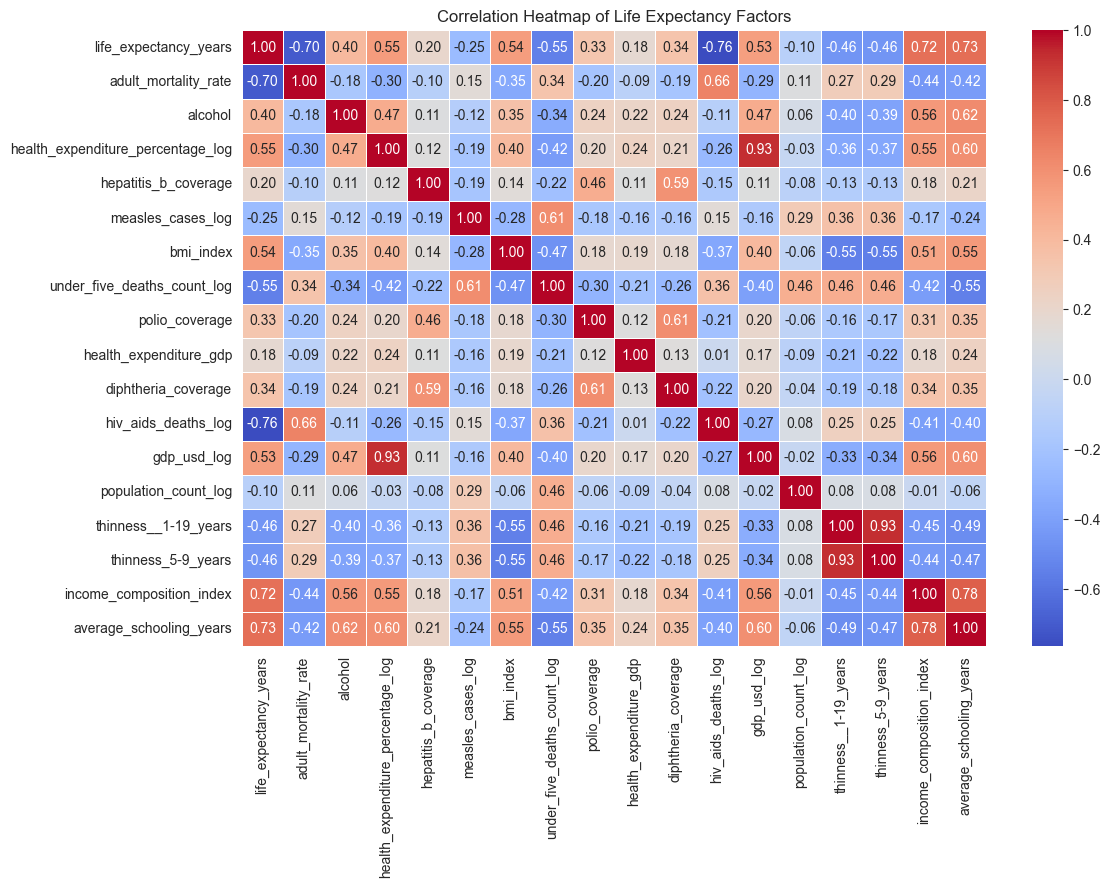

In [15]:
# Selecting relevant numerical columns
corr_columns = [
    'life_expectancy_years', 'adult_mortality_rate', 'alcohol',
    'health_expenditure_percentage_log', 'hepatitis_b_coverage',
    'measles_cases_log', 'bmi_index', 'under_five_deaths_count_log',
    'polio_coverage', 'health_expenditure_gdp', 'diphtheria_coverage',
    'hiv_aids_deaths_log', 'gdp_usd_log', 'population_count_log',
    'thinness__1-19_years', 'thinness_5-9_years',
    'income_composition_index', 'average_schooling_years'
]

# Correlation matrix
correlation_matrix = df[corr_columns].corr()

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Life Expectancy Factors")
plt.show()


In [16]:
correlation_values = correlation_matrix['life_expectancy_years'].sort_values(ascending=False)
strong_corr = correlation_values[abs(correlation_values) > 0.4]
print(strong_corr)


life_expectancy_years                1.000000
average_schooling_years              0.727476
income_composition_index             0.720937
health_expenditure_percentage_log    0.549948
bmi_index                            0.541678
gdp_usd_log                          0.533185
alcohol                              0.402673
thinness_5-9_years                  -0.457496
thinness__1-19_years                -0.457829
under_five_deaths_count_log         -0.546513
adult_mortality_rate                -0.702350
hiv_aids_deaths_log                 -0.764289
Name: life_expectancy_years, dtype: float64


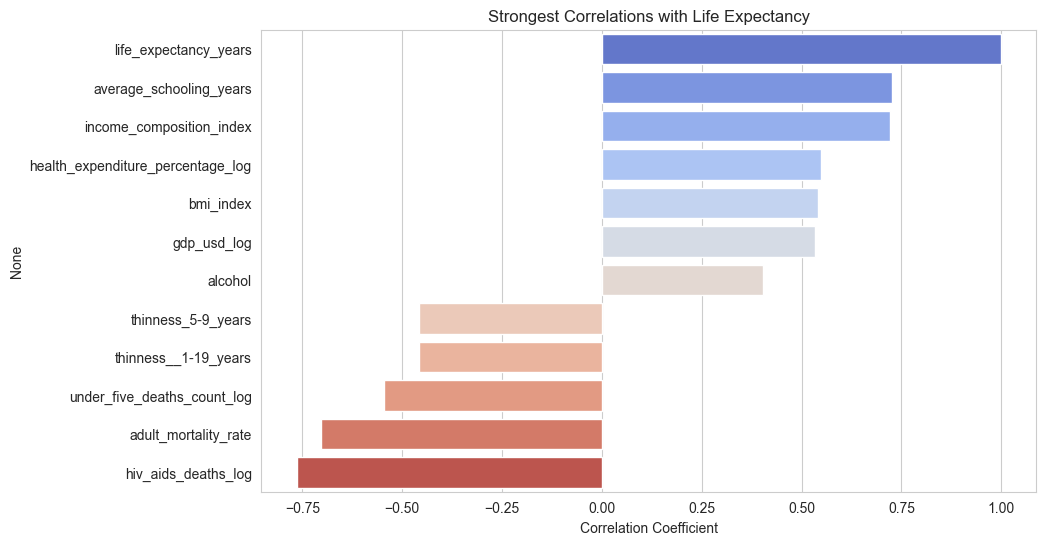

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=strong_corr.values, y=strong_corr.index, palette="coolwarm")
plt.title("Strongest Correlations with Life Expectancy")
plt.xlabel("Correlation Coefficient")
plt.show()


In [18]:
import pycountry_convert as pc

def get_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_map = {
            "AF": "Africa",
            "AS": "Asia",
            "EU": "Europe",
            "NA": "North America",
            "SA": "South America",
            "OC": "Oceania"
        }
        return continent_map.get(continent_code, "Other")
    except:
        return "Unknown"

df["region"] = df["country"].apply(get_continent)


In [19]:
print(df["region"].unique())

['Asia' 'Europe' 'Africa' 'South America' 'Oceania' 'North America'
 'Unknown']


In [20]:
unknown_countries = df[df["region"] == "Unknown"]["country"].unique()
print("Countries with Unknown region:", unknown_countries)

Countries with Unknown region: ['Timor-Leste']


In [21]:
df.loc[df["country"] == "Timor-Leste", "region"] = "Asia"

In [22]:
print(df[df["country"] == "Timor-Leste"]["region"])

1468    Asia
1469    Asia
1470    Asia
1471    Asia
1472    Asia
1473    Asia
1474    Asia
Name: region, dtype: object


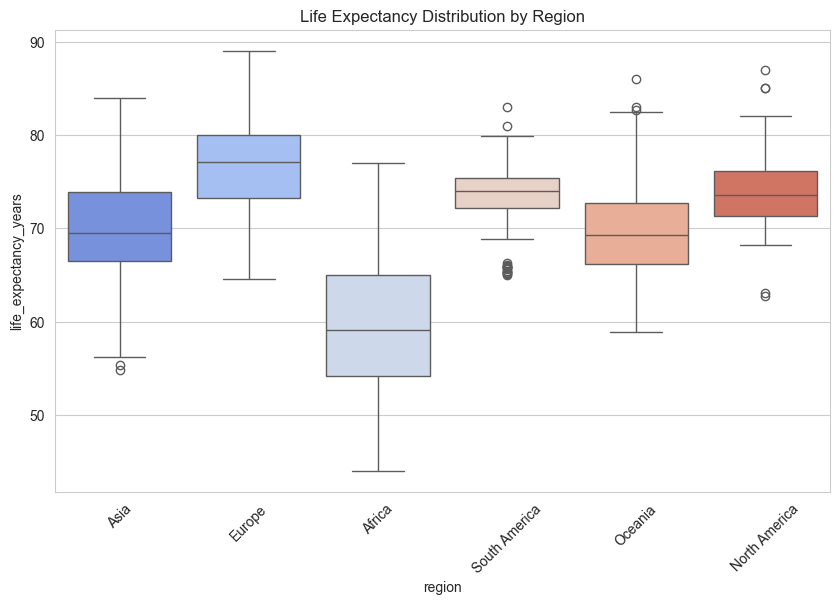

In [23]:
#Check the Distribution of Life Expectancy by Region
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["region"], y=df["life_expectancy_years"], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Life Expectancy Distribution by Region")
plt.show()


In [24]:
# display mean life expectancy per region
region_means = df.groupby("region")["life_expectancy_years"].mean().sort_values(ascending=False)
print(region_means)


region
Europe           76.957558
North America    74.035119
South America    73.414615
Oceania          70.181513
Asia             70.153753
Africa           59.950106
Name: life_expectancy_years, dtype: float64


In [25]:
import scipy.stats as stats

# Perform ANOVA test to test if the differences in life expectancy between regions are statistically significant.
anova_result = stats.f_oneway(*(df[df["region"] == r]["life_expectancy_years"] for r in df["region"].unique()))
print(f"ANOVA p-value: {anova_result.pvalue}")


ANOVA p-value: 5.826967813230303e-268


### Exploring  Potential Explanatory Factors for the difference in life expectancy years

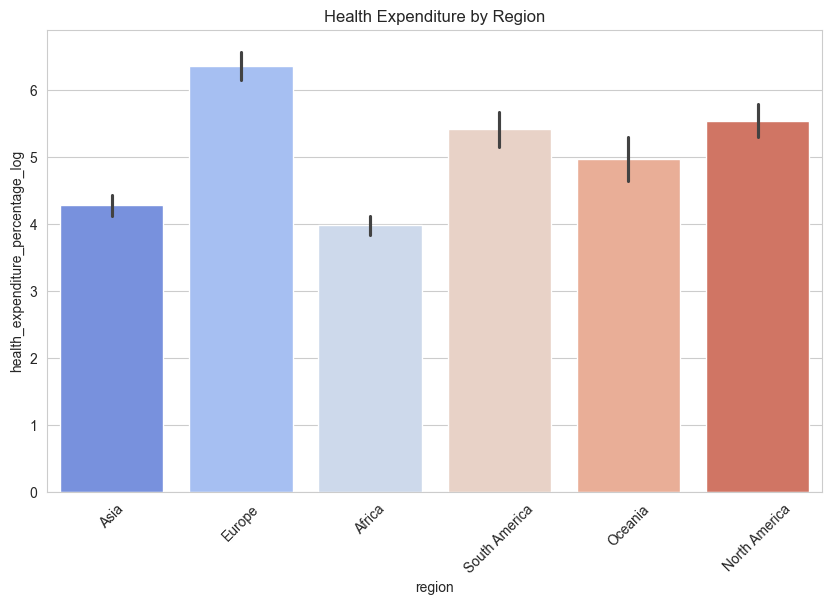

In [26]:
#Health Expenditure by Region
plt.figure(figsize=(10, 6))
sns.barplot(x="region", y="health_expenditure_percentage_log", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Health Expenditure by Region")
plt.show()


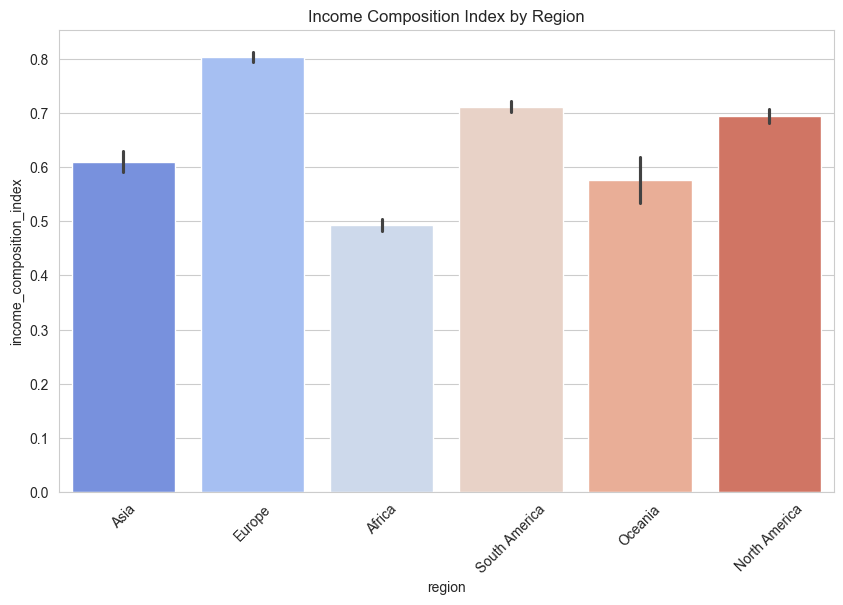

In [27]:
#Income composition Index by Region
plt.figure(figsize=(10, 6))
sns.barplot(x="region", y="income_composition_index", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Income Composition Index by Region")
plt.show()


In [28]:
# finding the outliers by countries 
# Group by region and compute IQR for life expectancy
grouped = df.groupby("region")["life_expectancy_years"]
Q1 = grouped.transform(lambda x: x.quantile(0.25))
Q3 = grouped.transform(lambda x: x.quantile(0.75))
IQR = Q3 - Q1

# Define outliers: below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
df["outlier"] = (df["life_expectancy_years"] < (Q1 - 1.5 * IQR)) | (df["life_expectancy_years"] > (Q3 + 1.5 * IQR))

# Filter outliers
outliers = df[df["outlier"]][["country", "region", "life_expectancy_years"]]

# Display outlier countries
print("Outlier countries in life expectancy per region:")
print(outliers.to_string(index=False))


Outlier countries in life expectancy per region:
    country        region  life_expectancy_years
Afghanistan          Asia                   55.3
Afghanistan          Asia                   54.8
  Australia       Oceania                   82.7
  Australia       Oceania                   86.0
  Australia       Oceania                   83.0
     Canada North America                   87.0
     Canada North America                   85.0
     Canada North America                   85.0
      Chile South America                   83.0
      Chile South America                   81.0
     Guyana South America                   66.0
     Guyana South America                   65.9
     Guyana South America                   65.8
     Guyana South America                   65.6
     Guyana South America                   65.9
     Guyana South America                   66.1
     Guyana South America                   66.3
     Guyana South America                   65.7
     Guyana South Am

In [29]:
#Ananlysing the key factors in the outlier countries
# List of outlier countries
outlier_countries = [
    "Afghanistan", "Australia", "Canada", "Chile", "Guyana", "Haiti"
]

# Select relevant columns for analysis
key_factors = [
    "country", "region", "life_expectancy_years", "average_schooling_years",
    "income_composition_index", "health_expenditure_percentage", "gdp_usd",
    "adult_mortality_rate", "infant_deaths_count", "hiv_aids_deaths"
]

# Filter dataset for outlier countries
outlier_data = df[df["country"].isin(outlier_countries)][key_factors]

# Display the extracted data
outlier_data


,country,region,life_expectancy_years,average_schooling_years,income_composition_index,health_expenditure_percentage,gdp_usd,adult_mortality_rate,infant_deaths_count,hiv_aids_deaths
1,Afghanistan,Asia,59.9,10.0,0.476,73.523582,612.696514,271,64,0.1
2,Afghanistan,Asia,59.9,9.9,0.470,73.219243,631.744976,268,66,0.1
3,Afghanistan,Asia,59.5,9.8,0.463,78.184215,669.959000,272,69,0.1
4,Afghanistan,Asia,59.2,9.5,0.454,7.097109,63.537231,275,71,0.1
5,Afghanistan,Asia,58.8,9.2,0.448,79.679367,553.328940,279,74,0.1
...,...,...,...,...,...,...,...,...,...,...
644,Guyana,South America,65.3,11.1,0.611,16.479490,986.795817,237,1,2.1
645,Guyana,South America,65.3,11.0,0.609,10.936339,96.867483,244,1,2.3
646,Guyana,South America,65.4,10.9,0.606,15.549787,925.582546,247,1,1.7
647,Haiti,North America,63.1,9.1,0.487,5.103249,83.114812,245,14,0.5


In [30]:
# Compute regional averages for comparison
regional_avg = df.groupby("region")[key_factors[2:]].mean()

# Compute deviations of outlier countries from their regional average
outlier_deviation = outlier_data.copy()
for factor in key_factors[2:]:
    outlier_deviation[f"{factor}_deviation"] = outlier_deviation[factor] - outlier_deviation["region"].map(regional_avg[factor])

# Display the deviations
outlier_deviation[["country", "region"] + [f"{factor}_deviation" for factor in key_factors[2:]]]


,country,region,life_expectancy_years_deviation,average_schooling_years_deviation,income_composition_index_deviation,health_expenditure_percentage_deviation,gdp_usd_deviation,adult_mortality_rate_deviation,infant_deaths_count_deviation,hiv_aids_deaths_deviation
1,Afghanistan,Asia,-10.253753,-1.588136,-0.134426,-168.338400,-2487.500954,125.578692,-13.765133,-0.059564
2,Afghanistan,Asia,-10.253753,-1.688136,-0.140426,-168.642738,-2468.452492,122.578692,-11.765133,-0.059564
3,Afghanistan,Asia,-10.653753,-1.788136,-0.147426,-163.677766,-2430.238468,126.578692,-8.765133,-0.059564
4,Afghanistan,Asia,-10.953753,-2.088136,-0.156426,-234.764873,-3036.660237,129.578692,-6.765133,-0.059564
5,Afghanistan,Asia,-11.353753,-2.388136,-0.162426,-162.182614,-2546.868528,133.578692,-3.765133,-0.059564
...,...,...,...,...,...,...,...,...,...,...
644,Guyana,South America,-8.114615,-2.350000,-0.100077,-490.389694,-3482.771705,104.415385,-12.123077,1.820769
645,Guyana,South America,-8.114615,-2.450000,-0.102077,-495.932846,-4372.700039,111.415385,-12.123077,2.020769
646,Guyana,South America,-8.014615,-2.550000,-0.105077,-491.319398,-3543.984976,114.415385,-12.123077,1.420769
647,Haiti,North America,-10.935119,-3.235714,-0.207589,-789.180667,-5259.125487,113.041667,7.613095,0.018452


In [31]:
# Convert all deviation columns to numeric, forcing errors to NaN (if any)
for factor in key_factors[2:]:  
    outlier_deviation[f"{factor}_deviation"] = pd.to_numeric(outlier_deviation[f"{factor}_deviation"], errors="coerce")

# Group by country and region, then compute the mean deviation
summary_deviation = (
    outlier_deviation
    .groupby(["country", "region"], as_index=False)  # Keep region
    .mean(numeric_only=True)  # Ensures only numeric columns are averaged
)

# Keep only deviation columns and region for a cleaner output
deviation_columns = ["country", "region"] + [col for col in summary_deviation.columns if "_deviation" in col]
summary_deviation_cleaned = summary_deviation[deviation_columns]

# Display the cleaned summarized deviation table
summary_deviation_cleaned


,country,region,life_expectancy_years_deviation,average_schooling_years_deviation,income_composition_index_deviation,health_expenditure_percentage_deviation,gdp_usd_deviation,adult_mortality_rate_deviation,infant_deaths_count_deviation,hiv_aids_deaths_deviation
0,Afghanistan,Asia,-12.413753,-3.501469,-0.199293,-209.323172,-2776.464961,124.045359,1.568200,-0.059564
1,Australia,Oceania,11.725630,7.525210,0.341782,5185.148440,29760.083800,-78.403361,-0.462185,-0.139496
2,Canada,North America,8.198214,3.514286,0.201494,4518.784664,24226.690483,-65.208333,-4.386905,-0.381548
3,Chile,South America,6.529829,1.894444,0.105145,532.393323,2529.191154,-54.251282,-11.123077,-0.179231
4,Guyana,South America,-7.800330,-2.635714,-0.091291,-293.477364,-2793.938543,67.558242,-12.551648,0.835055
5,Haiti,North America,-11.135119,-3.235714,-0.209589,-789.237436,-5260.050056,117.041667,7.613095,0.018452


In [32]:
# Compute benchmark (regional average life expectancy)
benchmark_values = regional_avg["life_expectancy_years"].to_dict()

# Compute outlier life expectancy
outlier_values = summary_deviation_cleaned.groupby("region")["life_expectancy_years_deviation"].mean() + regional_avg["life_expectancy_years"]
outlier_values = outlier_values.to_dict()

# Define regions dynamically
valid_regions = list(benchmark_values.keys())
valid_benchmarks = [benchmark_values[r] for r in valid_regions]
valid_outliers = [outlier_values.get(r, None) for r in valid_regions]


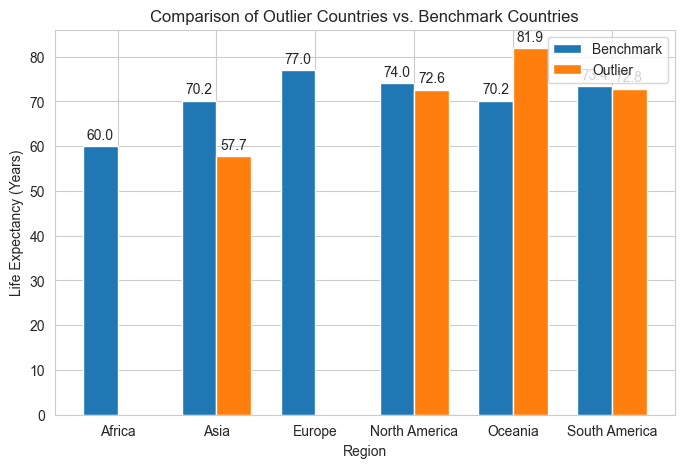

In [33]:
# Remove None values (ensure only valid comparisons)
valid_regions = [r for r, o in zip(valid_regions, valid_outliers) if o is not None]
valid_benchmarks = [benchmark_values[r] for r in valid_regions]
valid_outliers = [outlier_values[r] for r in valid_regions]

x = np.arange(len(valid_regions))
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, valid_benchmarks, width, label="Benchmark")
bars2 = ax.bar(x + width/2, valid_outliers, width, label="Outlier")

# Labels and title
ax.set_xlabel("Region")
ax.set_ylabel("Life Expectancy (Years)")
ax.set_title("Comparison of Outlier Countries vs. Benchmark Countries")
ax.set_xticks(x)
ax.set_xticklabels(valid_regions)
ax.legend()

# Display values on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()


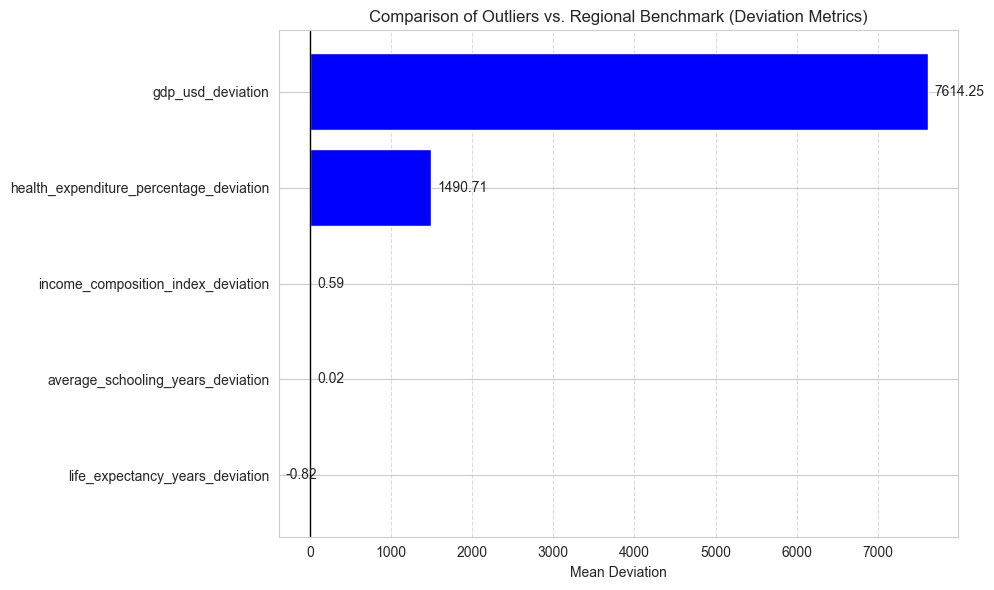

In [34]:
# Define key deviation metrics for comparison
metrics = [
    "life_expectancy_years_deviation",
    "average_schooling_years_deviation",
    "income_composition_index_deviation",
    "health_expenditure_percentage_deviation",
    "gdp_usd_deviation"
]

# Compute the mean deviation for each metric
mean_deviation = summary_deviation_cleaned[metrics].mean()

# Sort values for better visualization
mean_deviation = mean_deviation.sort_values()

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(metrics, mean_deviation, color=["red" if v < 0 else "blue" for v in mean_deviation])

# Labels and title
ax.set_xlabel("Mean Deviation")
ax.set_title("Comparison of Outliers vs. Regional Benchmark (Deviation Metrics)")
ax.axvline(x=0, color="black", linewidth=1)  # Add a vertical line at zero
ax.grid(axis="x", linestyle="--", alpha=0.7)  # Add grid lines for visibility

# Display values on bars
for bar in bars:
    width = bar.get_width()
    ax.annotate(f"{width:.2f}", 
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),
                textcoords="offset points",
                ha='left' if width > 0 else 'right', va='center')

plt.tight_layout()
plt.show()


In [35]:
#Correlation per region
# Define key factors
key_factors = [
    'life_expectancy_years', 'average_schooling_years', 'income_composition_index',
    'health_expenditure_percentage', 'gdp_usd', 'adult_mortality_rate',
    'infant_deaths_count', 'hiv_aids_deaths'
]

# Compute correlations per region
region_corrs = df.groupby('region')[key_factors].corr().unstack().loc[:, 'life_expectancy_years']

# Display correlations of life expectancy with other factors per region
region_corrs


,life_expectancy_years,average_schooling_years,income_composition_index,health_expenditure_percentage,gdp_usd,adult_mortality_rate,infant_deaths_count,hiv_aids_deaths
region,,,,,,,,
Africa,1.0,0.428494,0.581784,0.319737,0.350335,-0.595058,-0.239058,-0.629042
Asia,1.0,0.694196,0.564779,0.461232,0.497838,-0.628847,-0.206779,-0.238701
Europe,1.0,0.466162,0.551502,0.459025,0.458628,-0.606230,-0.423455,-0.414412
North America,1.0,0.611440,0.651039,0.535171,0.487859,-0.466117,0.053956,-0.372582
Oceania,1.0,0.816686,0.631995,0.601006,0.599623,-0.461650,-0.493358,-0.539095
South America,1.0,0.749362,0.841725,0.371348,0.389724,-0.480522,-0.001351,-0.678760


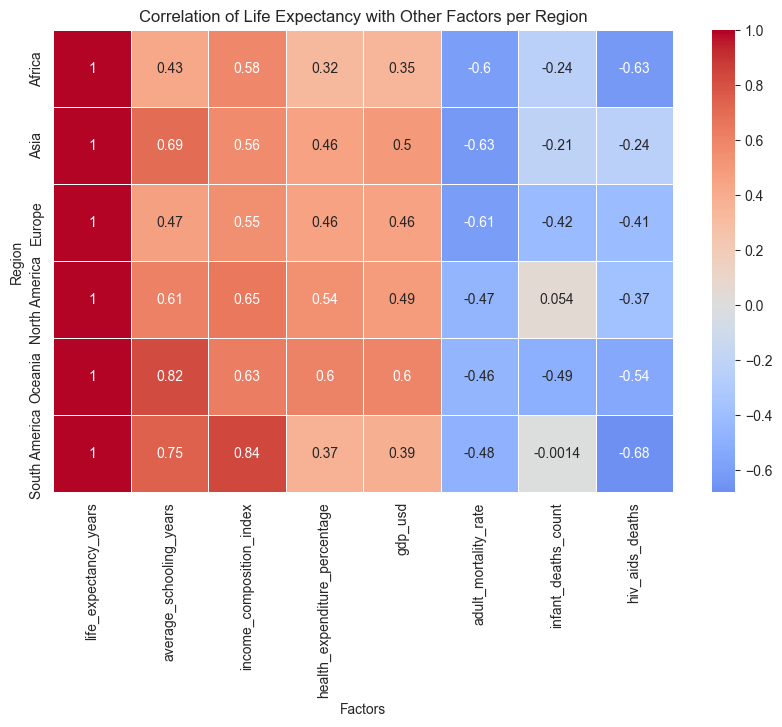

In [36]:
plt.figure(figsize=(10, 6))
sns.heatmap(region_corrs, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation of Life Expectancy with Other Factors per Region")
plt.xlabel("Factors")
plt.ylabel("Region")
plt.show()


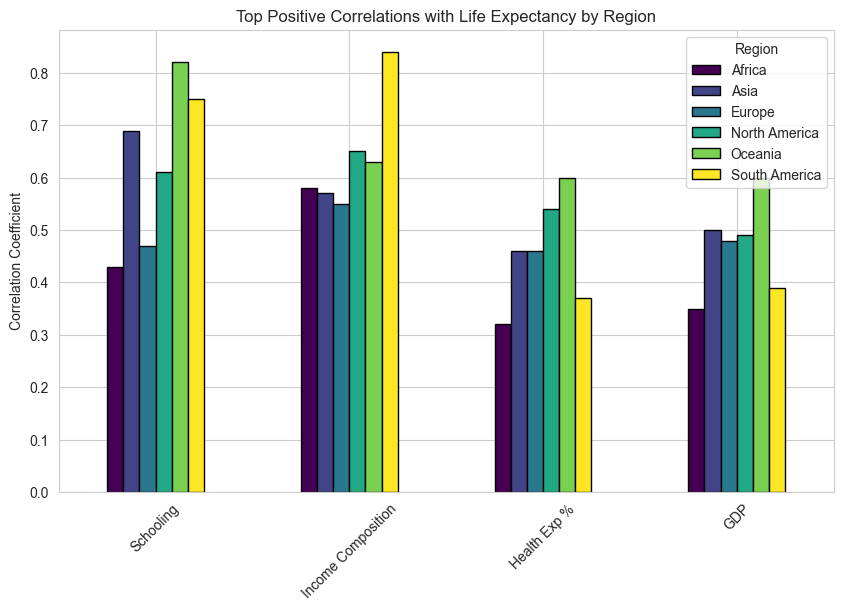

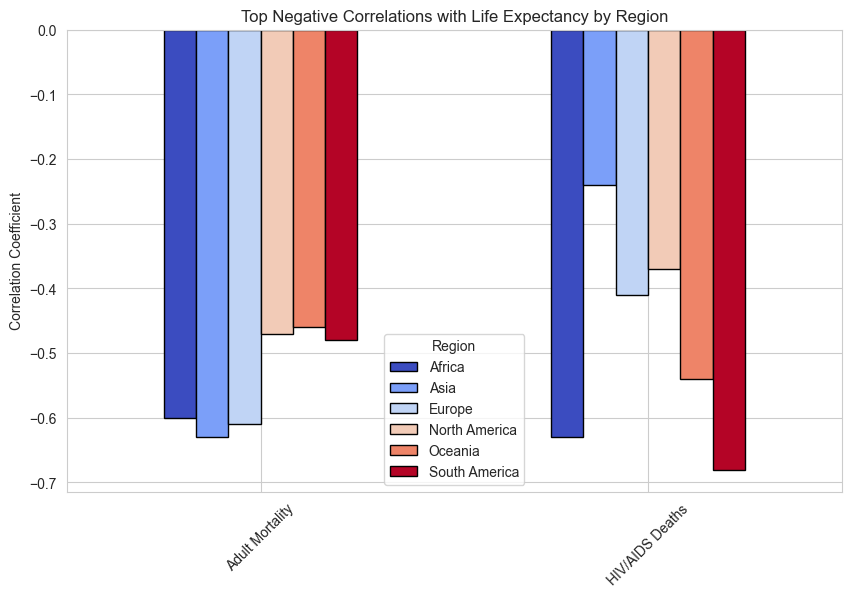

In [37]:
# Correlation results stored in a dictionary
correlation_data = {
    "Africa": [0.43, 0.58, 0.32, 0.35, -0.60, -0.63],
    "Asia": [0.69, 0.57, 0.46, 0.50, -0.63, -0.24],
    "Europe": [0.47, 0.55, 0.46, 0.48, -0.61, -0.41],
    "North America": [0.61, 0.65, 0.54, 0.49, -0.47, -0.37],
    "Oceania": [0.82, 0.63, 0.60, 0.60, -0.46, -0.54],
    "South America": [0.75, 0.84, 0.37, 0.39, -0.48, -0.68]
}

# Factors corresponding to the values
factors = ["Schooling", "Income Composition", "Health Exp %", "GDP", "Adult Mortality", "HIV/AIDS Deaths"]

# Convert to DataFrame
df_corr = pd.DataFrame(correlation_data, index=factors)

# Separate positive and negative correlations
df_pos = df_corr.iloc[:4] 
df_neg = df_corr.iloc[4:] 

# Plot positive correlations
df_pos.plot(kind='bar', figsize=(10, 6), colormap='viridis', edgecolor='black')
plt.title("Top Positive Correlations with Life Expectancy by Region")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.show()

# Plot negative correlations
df_neg.plot(kind='bar', figsize=(10, 6), colormap='coolwarm', edgecolor='black')
plt.title("Top Negative Correlations with Life Expectancy by Region")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.show()


## Trend Analysis

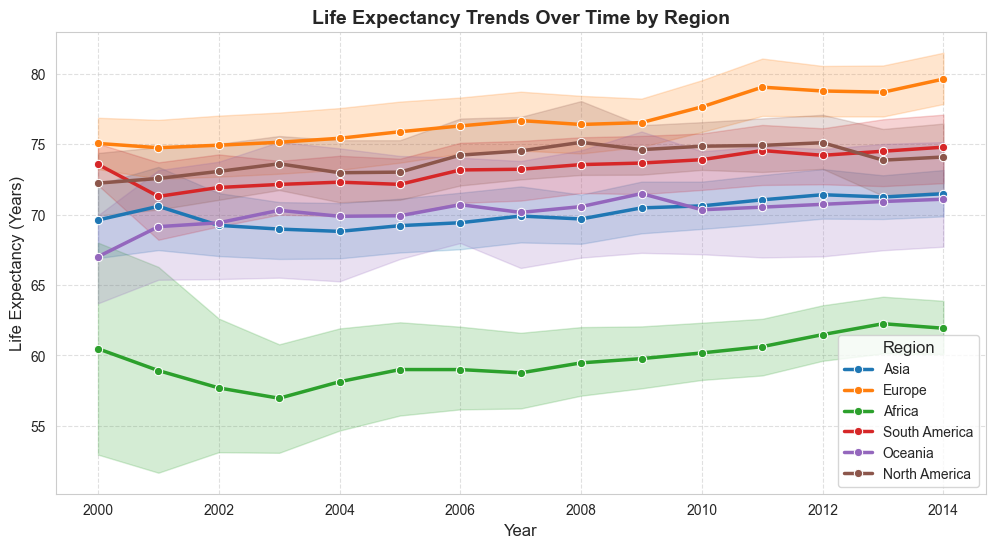

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df, 
    x='year', 
    y='life_expectancy_years', 
    hue='region', 
    marker='o', 
    linewidth=2.5, 
    palette='tab10'
)
plt.title('Life Expectancy Trends Over Time by Region', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy (Years)', fontsize=12)
plt.legend(title='Region', title_fontsize=12, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

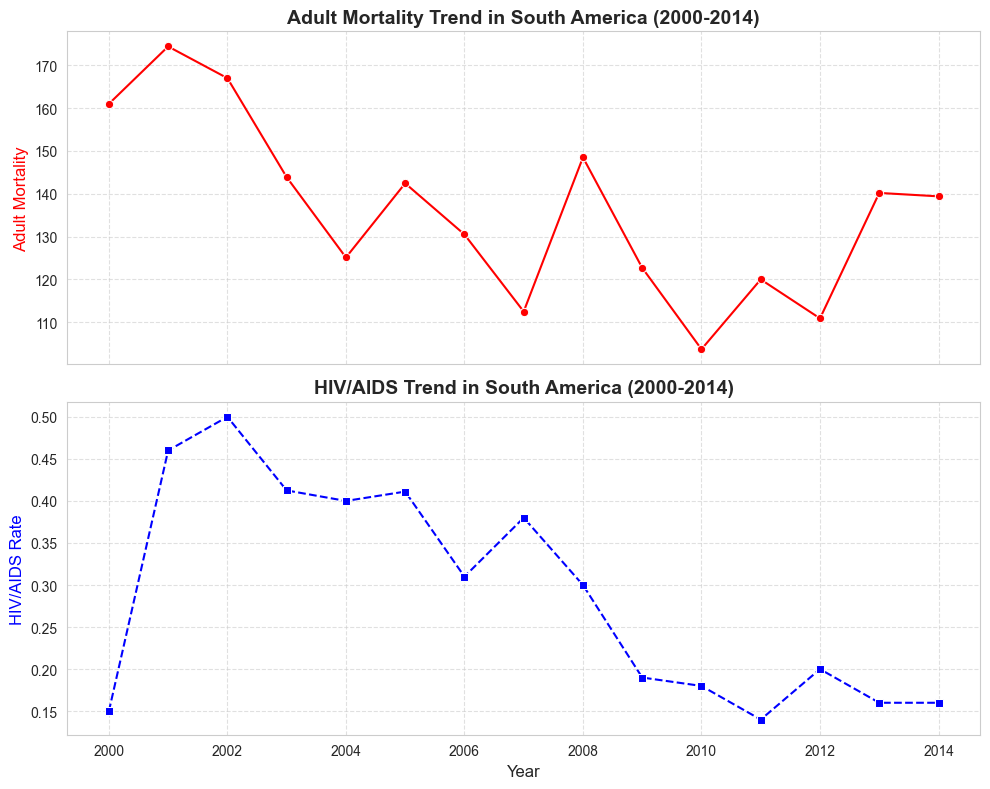

In [47]:
# Filter South America data
south_america_data = df[df['region'] == 'South America']

# Group by year
south_america_data = south_america_data.groupby('year', as_index=False).mean(numeric_only=True)
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Adult Mortality Plot
sns.lineplot(data=south_america_data, x='year', y='adult_mortality_rate', ax=axes[0], color='red', marker='o')
axes[0].set_ylabel('Adult Mortality', fontsize=12, color='red')
axes[0].set_title('Adult Mortality Trend in South America (2000-2014)', fontsize=14, fontweight='bold')
axes[0].grid(True, linestyle='--', alpha=0.6)

# HIV/AIDS Plot
sns.lineplot(data=south_america_data, x='year', y='hiv_aids_deaths', ax=axes[1], color='blue', marker='s', linestyle='--')
axes[1].set_ylabel('HIV/AIDS Rate', fontsize=12, color='blue')
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_title('HIV/AIDS Trend in South America (2000-2014)', fontsize=14, fontweight='bold')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


# Final Summary: Life Expectancy Trends (2000-2014) with Key Influencing Factors 

## 1️⃣ Overall Trends

-  Life expectancy increased in most regions from 2000 to 2014, with **Europe & North America** consistently leading in life expectancy levels. **Africa** saw steady improvements but remained lower than other regions. However, **South America** experienced a **notable decline in life expectancy**, making it an important exception in the global trend.

-  **Key Adjustment**:  
  We dropped 2015 from the analysis since only two countries had data, making comparisons unreliable.

## 2️ Key Factors Influencing Life Expectancy

Our analysis revealed that while some factors strongly influenced life expectancy, others had a weaker-than-expected impact.

### A. Economic & Social Factors (Income & Education)

-  **Higher GDP & income composition index = Longer life expectancy**
  - **Europe & North America**: High GDP countries (e.g., Canada, Germany) had life expectancy above 75 years.
  - **Africa**: Lower GDP countries (e.g., Chad, Malawi) had life expectancy below 65 years.
  - **South America**: Despite economic growth, life expectancy dropped, suggesting non-economic factors such as public health crises, environmental issues, or social instability.

-  **More years of schooling = Higher life expectancy**
  - **Europe** (12+ years of schooling): Life expectancy around 75-80 years.
  - **Africa** (9-11 years): Life expectancy around 60-70 years.
  - **South America**: Education levels remained stable, yet life expectancy dropped, indicating that other factors like health crises or environmental/social challenges had a significant role.

-  **Takeaway**: While education and economic growth improve health awareness and well-being, they were insufficient to prevent South America's decline in life expectancy, which points to deeper public health or social factors at play.

### B. Immunization Rates & Health Indicators

-  **Surprising Finding**:  
  While we initially expected Hepatitis B, Polio, and Diphtheria immunization rates to strongly correlate with life expectancy, our analysis showed a weaker-than-expected relationship.

-  **Stronger associations** were found with:
  - **Schooling years**
  - **Income composition index**
  - **Healthcare expenditure** (though less impactful than expected)

- 📉 **Negative Correlations with Life Expectancy**:
  - **HIV/AIDS prevalence**
  - **Adult mortality rates**

### C. Regional Trends in Adult Mortality & HIV/AIDS

-  **Adult Mortality (highest to lowest)**:
  1. **Asia** (highest)
  2. **Europe**
  3. **Africa**
  4. **South America**
  5. **North America**
  6. **Oceania** (lowest)

-  **HIV/AIDS Prevalence (highest to lowest)**:
  1. **South America** (highest)
  2. **Africa**
  3. **Oceania**
  4. **Europe**
  5. **North America**
  6. **Asia** (lowest)

-  **Takeaway**: HIV/AIDS & adult mortality significantly impacted life expectancy—especially in **South America**, where despite growth in education and economic factors, the rise in HIV/AIDS and adult mortality likely contributed to the decline.

## 3️⃣ Final Conclusions from Our Analysis 

 **1️⃣ Life Expectancy is Strongly Driven by Education & Income**
  - Schooling & Income Composition Index were the strongest positive factors.
  - Higher GDP (log-transformed) also correlated with longer life expectancy.
  - Healthcare expenditure had little impact, suggesting that spending more doesn't always result in better health outcomes.

 **2️⃣ Regional Disparities Exist in Health Outcomes**
  - **Europe & North America**: Longer life expectancy due to better education, income, and healthcare access.
  - **Africa**: Gradual improvements, though disparities persist.
  - **South America**: Life expectancy declined, despite economic and educational stability, suggesting health crises (HIV/AIDS & rising adult mortality) played a significant role.

 **3️⃣ Immunization Had a Weaker Impact Than Expected**
  - Hepatitis B, Polio, & Diphtheria vaccination coverage was less correlated with life expectancy than we anticipated.
  - Stronger relationships were found with **schooling years** and **income composition**.
  - **HIV/AIDS** and **adult mortality** were found to have a stronger negative effect on life expectancy.

 **4️⃣ Trends Over Time Show Improvements in Most Regions, Except South America**
  - Life expectancy increased globally, but **South America** stands out with a decline.
  - Education, income, and immunization rates improved across the board, but the rise in **HIV/AIDS** and **adult mortality** was a major issue in certain regions, particularly South America.

 **5️⃣ Urgent Interventions Needed for Certain Regions**
  - **Sub-Saharan Africa & low-income countries** require targeted education and income growth strategies to improve life expectancy.
  - **South America** needs urgent public health policies to address **HIV/AIDS prevention** and reduce **adult mortality rates**.
  - Efficient allocation of **healthcare funding** is needed, as spending more doesn’t necessarily translate to better health outcomes.

---

### **Final Thought 💡**

Our analysis reaffirms that **education** and **economic stability** are fundamental drivers of better health outcomes. However, South America's **decline in life expectancy** despite progress in education and economic stability highlights the critical role of **HIV/AIDS**, **adult mortality**, and other public health challenges. Public health interventions focusing on prevention and addressing social instability are key to reversing these trends.


Key Findings and Analysis

    Overall Trends in Life Expectancy (2000-2014)
        Life expectancy increased globally from 2000 to 2014, with regions like Europe and North America consistently showing higher life expectancy levels.
        Africa exhibited steady improvements, though it remained lower than other regions. In contrast, South America saw a decline in life expectancy, suggesting that regional factors, beyond economic and educational progress, influenced health outcomes.
        South America's decline in life expectancy, despite stable economic growth, may indicate the role of public health crises, such as HIV/AIDS, and rising adult mortality rates.

    Key Influencing Factors

    A. Economic & Social Factors (Income & Education)
        GDP & Income Composition: Higher GDP and income composition index were strongly correlated with longer life expectancy. Developed countries in Europe and North America, such as Germany and Canada, saw life expectancy above 75 years, while lower-income countries in Africa, such as Chad and Malawi, had life expectancy below 65 years.
        Schooling: More years of schooling were also associated with higher life expectancy. European countries with 12+ years of schooling had life expectancy around 75-80 years, while African countries with 9-11 years of schooling had life expectancy around 60-70 years.
        Takeaway: While income and education levels positively impacted life expectancy, South America’s decline underscores the importance of addressing health crises and social instability.

    B. Immunization Rates & Health Indicators
        Immunization: Surprisingly, Hepatitis B, Polio, and Diphtheria immunization rates had a weaker-than-expected relationship with life expectancy. However, stronger associations were found with schooling years, income composition, and healthcare expenditure (though its impact was moderate).
        Negative Correlations: Life expectancy was negatively impacted by adult mortality rates and the prevalence of HIV/AIDS, particularly in South America.

    C. Regional Trends in Adult Mortality & HIV/AIDS
        Adult Mortality: Adult mortality was highest in Asia and lowest in Oceania, with Europe, Africa, and South America showing intermediate levels.
        HIV/AIDS Prevalence: South America exhibited the highest prevalence of HIV/AIDS, which significantly impacted life expectancy, especially given the region’s economic growth and education improvements.

Conclusions

    Life Expectancy is Strongly Driven by Education and Income
        Higher schooling years and income composition were the most significant positive factors. GDP also had a positive correlation, suggesting that wealthier countries tend to have longer life expectancy. Healthcare expenditure had little impact, implying that spending more on healthcare doesn't always yield better health outcomes.

    Regional Disparities
        Europe and North America consistently showed higher life expectancy due to stronger education, income, and healthcare access.
        Sub-Saharan Africa showed gradual improvements, but large disparities remain, particularly in rural or lower-income areas.
        South America’s life expectancy decline, despite economic and educational progress, is a key concern that points to the need for urgent public health reforms, particularly in managing HIV/AIDS and reducing adult mortality.

    Immunization and Health Outcomes
        Immunization rates (Hepatitis B, Polio, and Diphtheria) did not have as strong an impact on life expectancy as anticipated. The findings suggest that other factors like income, education, and healthcare spending are more influential.

    Public Health Interventions Needed
        Sub-Saharan Africa and other low-income countries require targeted interventions to improve education and income levels.
        South America requires urgent public health interventions, particularly in tackling the rise of HIV/AIDS and addressing adult mortality.

Final Thought

This analysis confirms that education and economic stability are critical drivers of life expectancy. However, South America's unexpected decline in life expectancy, despite economic and educational growth, highlights the need for focused public health strategies. Tackling HIV/AIDS and reducing adult mortality rates will be key to improving life expectancy in the region. Future research should focus on understanding the nuanced relationship between health crises, socio-economic factors, and life expectancy trends.
